## Data  개요
**적포도주 및 백포도주 샘플의 물리화학적 특성 및 품질 등급**
- UCI 머신러닝 저장소에 공개 : [dataset](https://archive.ics.uci.edu/ml/datasets/Wine+Quality)
- 포르투갈 "Vinho Verde" 와인의 레드 및 화이트 변종 샘플에 대한 정보를 제공
- 각 와인 샘플은 와인 전문가에 의해 품질 평가를 받았고 화학적 테스트를 거쳤음
- 개인 정보 보호 및 물류 문제로 인해 포도 유형, 와인 브랜드, 와인 판매 가격 등에 대한 데이터가 없음

```
   Input variables (based on physicochemical tests):
   1 - fixed acidity (고정된 산도)
   2 - volatile acidity (휘발성 산도)
   3 - citric acid (구연산)
   4 - residual sugar (잔여 설탕)
   5 - chlorides (염화물)
   6 - free sulfur dioxide (유리 이산화황)
   7 - total sulfur dioxide (총 이산화황)
   8 - density (밀도)
   9 - pH (산도)
   10 - sulphates (황산염)
   11 - alcohol (알코올)
   
   Output variable (based on sensory data):
   12 - quality (품질) (score between 0 and 10)
```


## Step 1: 질문하기 (Ask questions)
데이터가 주어진 상태에서 질문을 할 수도 있고, 질문에 답할 수 있는 데이터를 수집할 수도 있다.

**질문 예시**
- 질문 1. 와인의 품질을 예측하는 데 가장 중요한 화학적 특성은 무엇일까?
- 질문 2. 어떤 유형(white, red)의 와인이 더 좋은 평가를 받을까?
- 질문 3. 알코올 도수가 높은 와인이 더 좋은 평가를 받을까?
- 질문 4. 더 달콤한 와인이 더 나은 평가를 받을까?
- 질문 5. 어느 정도의 산도가 와인 품질에 영향을 미칠까?

## Step 2: 데이터 랭글링 (Wrangle data)
- 데이터 랭글링 : 원자료(raw data)를 보다 쉽게 접근하고 분석할 수 있도록 데이터를 정리하고 통합하는 과정
(참고. 위키피디아)
- 세부적으로는 데이터의 수집(gather), 평가(assess), 정제(clean) 작업으로 나눌 수 있다.

**데이터 수집(gather)**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
rootdir = '/content/drive/MyDrive/2025_SeSAC/ statistics/data/'
red_wine = pd.read_csv(rootdir+'winequality-red.csv',sep=';')
white_wine = pd.read_csv(rootdir+'winequality-white.csv',sep=';')

In [ ]:
red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
white_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


**평가(assess)**

In [ ]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


**정제(clean)**

## Step 3: 데이터 탐색 (Exploratory Data Analysis)
데이터의 패턴을 찾고, 관계를 시각화 하는 작업 등으로 통해 데이터에 대한 직관을 극대화 한다.

질문 1. 와인의 품질을 예측하는 데 가장 중요한 화학적 특성은 무엇일까?

In [ ]:
red_wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [ ]:
# quality와의 상관계수만 추출
red_wine.corr()['quality'].sort_values(ascending=False).drop('quality') # 자기 자신 제외

,quality
alcohol,0.476166
sulphates,0.251397
citric acid,0.226373
fixed acidity,0.124052
residual sugar,0.013732
free sulfur dioxide,-0.050656
pH,-0.057731
chlorides,-0.128907
density,-0.174919
total sulfur dioxide,-0.185100


In [ ]:
white_wine.corr()['quality'].sort_values(ascending=False).drop('quality')

,quality
alcohol,0.435575
pH,0.099427
sulphates,0.053678
free sulfur dioxide,0.008158
citric acid,-0.009209
residual sugar,-0.097577
fixed acidity,-0.113663
total sulfur dioxide,-0.174737
volatile acidity,-0.194723
chlorides,-0.209934


질문 2. 어떤 유형(white, red)의 와인이 더 좋은 평가를 받을까?

In [ ]:
# 두 데이터셋 결합하기
# 각각에 'type' 컬럼 추가
red_wine['type'] = 'red'
white_wine['type'] = 'white'

# 두 데이터프레임 합치기 concat
wine = pd.concat([red_wine, white_wine], ignore_index=True) # 기존의 인덱스를 무시하고 새로운 연속된 정수 인덱스를 재지정
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


<Axes: xlabel='type', ylabel='quality'>

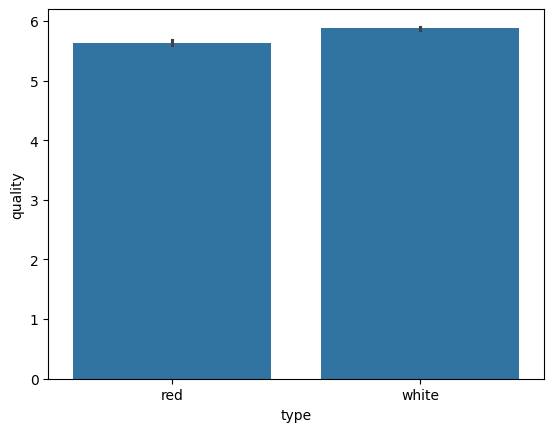

In [ ]:
sns.barplot(data=wine, x='type', y='quality')

질문 3. 알코올 도수가 높은 와인이 더 좋은 평가를 받을까?

<Axes: xlabel='quality', ylabel='alcohol'>

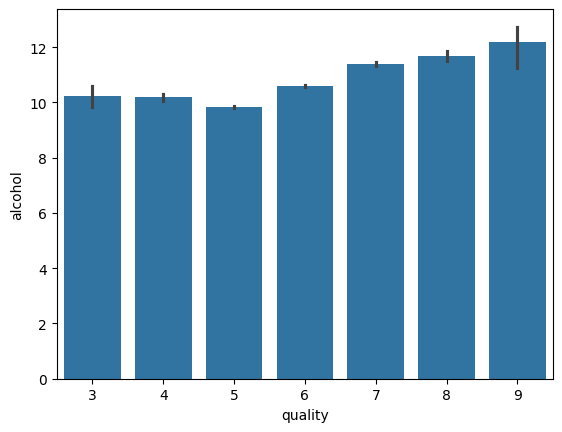

In [ ]:
sns.barplot(data=wine, x='quality', y='alcohol')

질문 4. 더 달콤한 와인이 더 나은 평가를 받을까?

<Axes: xlabel='quality', ylabel='residual sugar'>

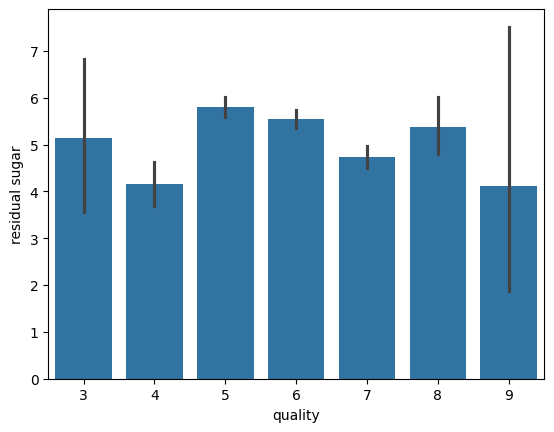

In [ ]:
sns.barplot(data=wine, x='quality', y='residual sugar')

In [ ]:
# quality별로 residual sugar 평균 계산
wine_avg = wine.groupby('quality')['residual sugar'].mean().reset_index()

# residual sugar 평균을 기준으로 내림차순 정렬
wine_sorted = wine_avg.sort_values(by='residual sugar', ascending=False)
wine_sorted

,quality,residual sugar
2,5,5.804116
3,6,5.549753
5,8,5.382902
0,3,5.140000
4,7,4.731696
1,4,4.153704
6,9,4.120000


질문 5. 어느 정도의 산도가 와인 품질에 영향을 미칠까?

<Axes: xlabel='quality', ylabel='pH'>

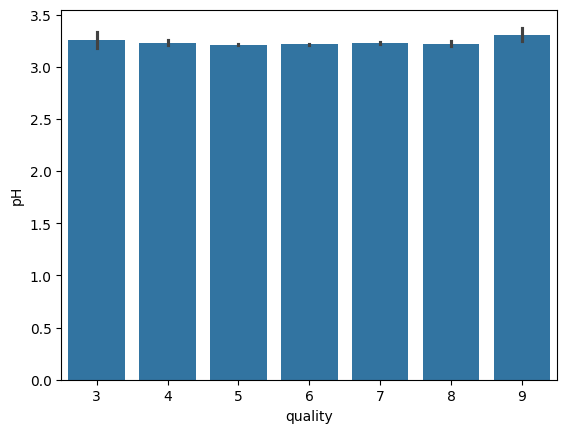

In [ ]:
sns.barplot(data=wine, x='quality', y='pH')

## Step 4: 결론 도출 또는 예측 (Draw conclusions or make predictions)

- **분석결과** :

질문 1. 와인의 품질을 예측하는 데 가장 중요한 화학적 특성은 무엇일까?
- 와인의 품질을 예측하는 데 가장 중요한 화학적 특성은 알코올이며
2순위로는 황산염, 3순위로는 구연산으로 확인 된다. (양의 상관관계)
음의 상관관계로는 1순위로 휘발성 산도, 2순위로 총 이산화황, 3순위로 밀도로 확인 된다.

질문 2. 어떤 유형(white, red)의 와인이 더 좋은 평가를 받을까?
- red보다 white가 더 좋은 평가를 받았다.
하지만 둘의 차이는 미미하기에 유의미한 차이가 있다고 판단 하기 어렵다.

질문 3. 알코올 도수가 높은 와인이 더 좋은 평가를 받을까?
- 품질이 5 이상으로 높아질수록 알코올 도수가 함께 증가하는 경향을 보인다.

질문 4. 더 달콤한 와인이 더 나은 평가를 받을까?
- 품질별 잔여 설탕량은 품질 5에서 가장 높았고, 품질 9에서 가장 낮았으나
품질 8은 높고, 품질 4는 낮은 걸 볼때 유의미한 관련이 있다고 판단하기 어렵다.

질문 5. 어느 정도의 산도가 와인 품질에 영향을 미칠까?
- 모든 와인의 산도는 약 3.0~3.25 사이에 있으므로 산도는 와인의 품질에 영향을 미치지 않는다.

## Step 5: 결과 공유 (Communicate the results)
보고서, 이메일, 블로그 등 다양한 방법을 통해 발견한 통찰들을 공유할 수 있다.